# COVID-19 Restrictions Start 

Explore impact of COVID-19 restrictions on Mental Health related searches through forecasting searches with Restrictions as Exogenous features and looking as feature importances.

In [1]:
import pandas as pd
import functions
import numpy as np
np.random.seed(42)


import pandas as pd
import warnings
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX

---

# Recursive multi-step forecasting with exogenous variables 

## Most Restricted Forecasting for start of COVID-19 pandemic 

### with Exogenous Variables 


 Forecast for most_restricted and depression untill 2020-05-30 

Test error (mse): 55.107946639927036 



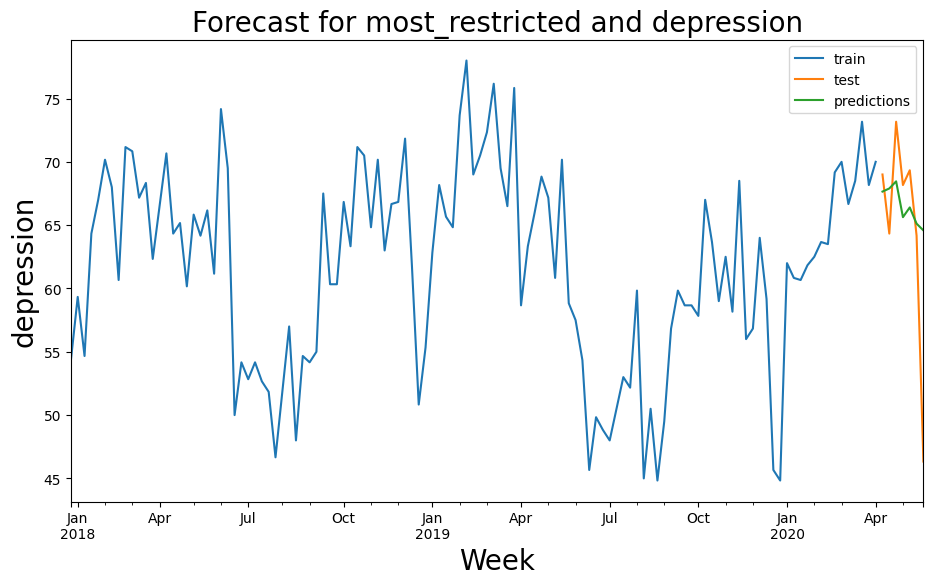


 Forecast for most_restricted and anxiety untill 2020-05-30 

Test error (mse): 3.950343081308009 



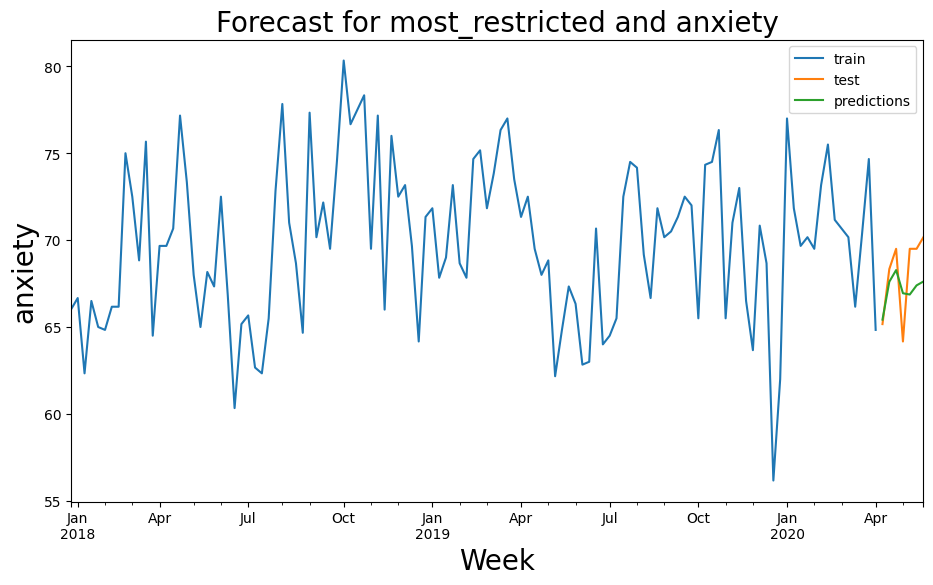


 Forecast for most_restricted and addiction untill 2020-05-30 

Test error (mse): 35.966867237318695 



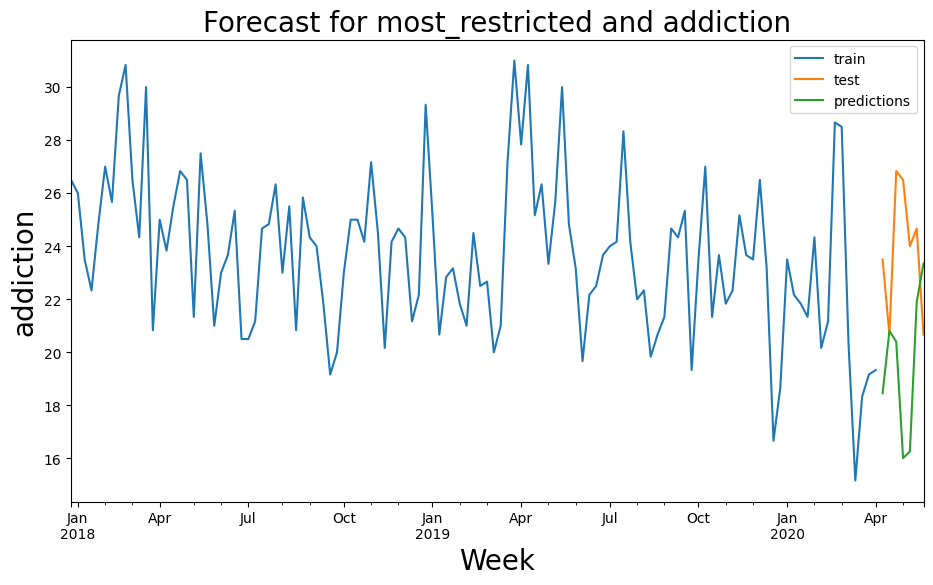


 Forecast for most_restricted and counselling untill 2020-05-30 

Test error (mse): 42.62272499132093 



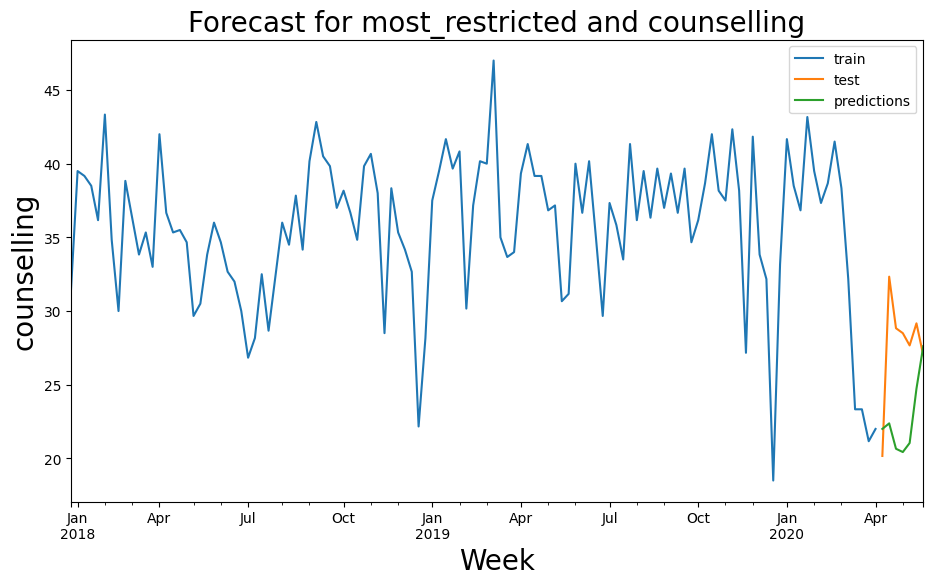


 Forecast for most_restricted and mental_health untill 2020-05-30 

Test error (mse): 43.941838757448515 



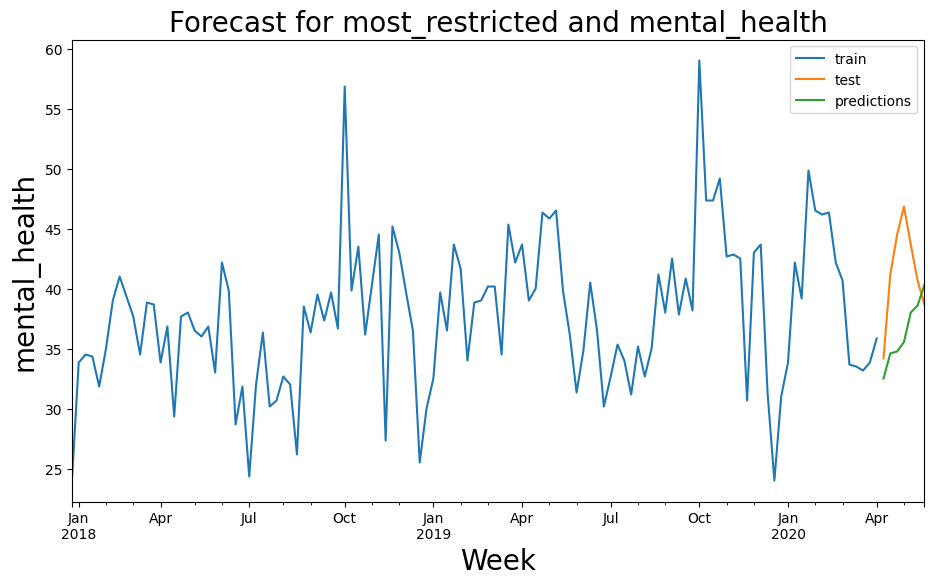

In [2]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
feature_imp_most = pd.DataFrame()
for search in searches_list:
        forecast = functions.forecast_file_search(file='most_restricted', period='2020-05-30', steps=7, search=search, regressor=Ridge(), lags=15)
        plt.show()
        if feature_imp_most.empty:
            feature_imp_most = forecast.get_feature_importance()
            feature_imp_most.rename(columns={'importance': search}, inplace=True)
        else:
            feature_imp_most = feature_imp_most.merge(forecast.get_feature_importance(), on = 'feature', how='left')
            feature_imp_most.rename(columns={'importance': search}, inplace=True)

MSE of all my models is lower than 100 and it is a good result we tried hyperparameter tuning, but it did not improve the MSE. 

### without Exogenous Variables 

In [3]:
for search in searches_list:
        functions.forecast_file_search_without_exogin(file='most_restricted', period='2020-05-30', steps=7, search=search, regressor=Ridge(), lags=15)


 Forecast for most_restricted and depression untill 2020-05-30 

Test error (mse): 49.71687412351952 


 Forecast for most_restricted and anxiety untill 2020-05-30 

Test error (mse): 3.164301166671109 


 Forecast for most_restricted and addiction untill 2020-05-30 

Test error (mse): 16.328771335919946 


 Forecast for most_restricted and counselling untill 2020-05-30 

Test error (mse): 66.09473470843348 


 Forecast for most_restricted and mental_health untill 2020-05-30 

Test error (mse): 48.01210264306873 



Mental health had the highest reduction of MSE from adding exogenous features. Anexiety MSE stayed about the same with and without Exoginous features. For Depression, Addiction, and Counselling had better scores without exogenous features.

---

## Least Restricted Forecastingfor start of COVID-19 pandemic 

###  with Exogenous Variables 


 Forecast for least_restricted and depression untill 2020-05-30 

Test error (mse): 68.46450445927732 



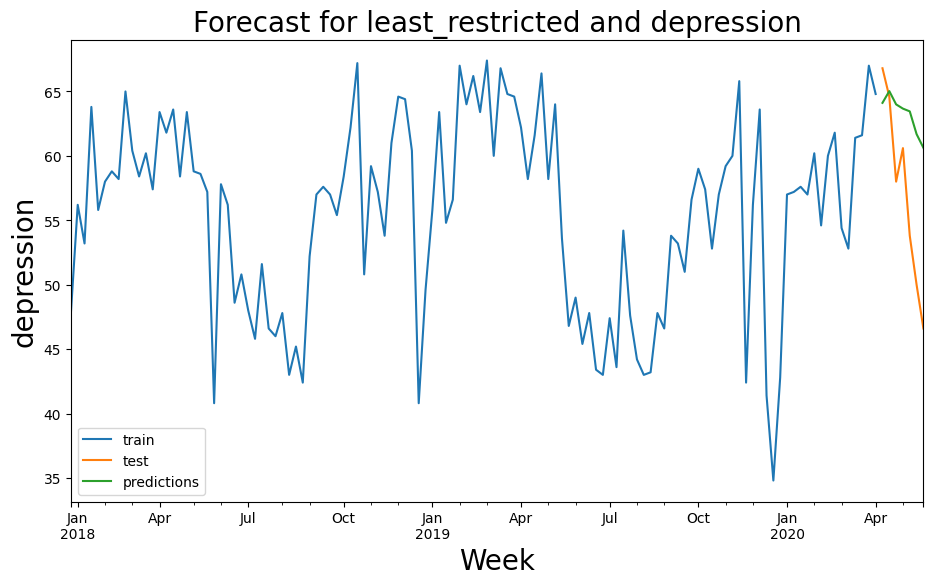


 Forecast for least_restricted and anxiety untill 2020-05-30 

Test error (mse): 24.067054369372425 



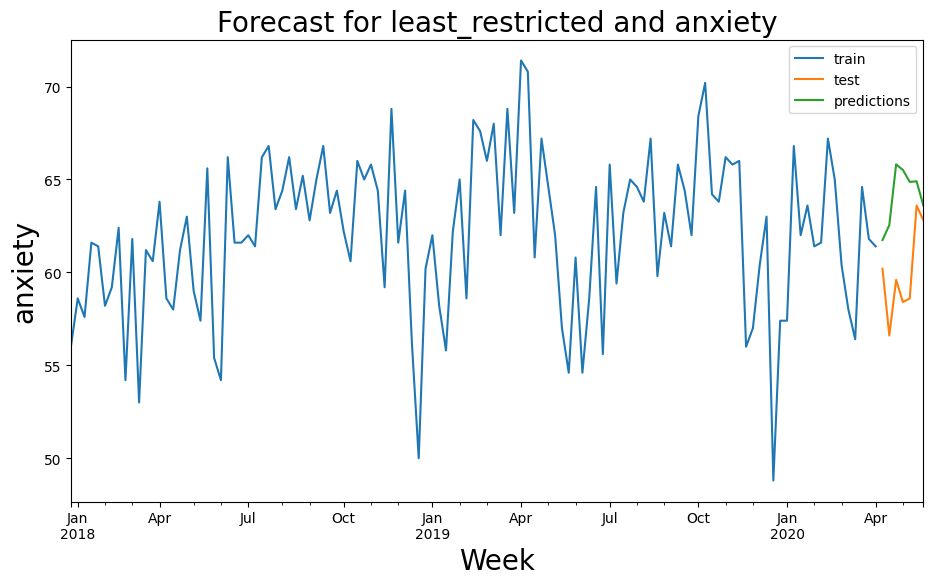


 Forecast for least_restricted and addiction untill 2020-05-30 

Test error (mse): 11.116394814025229 



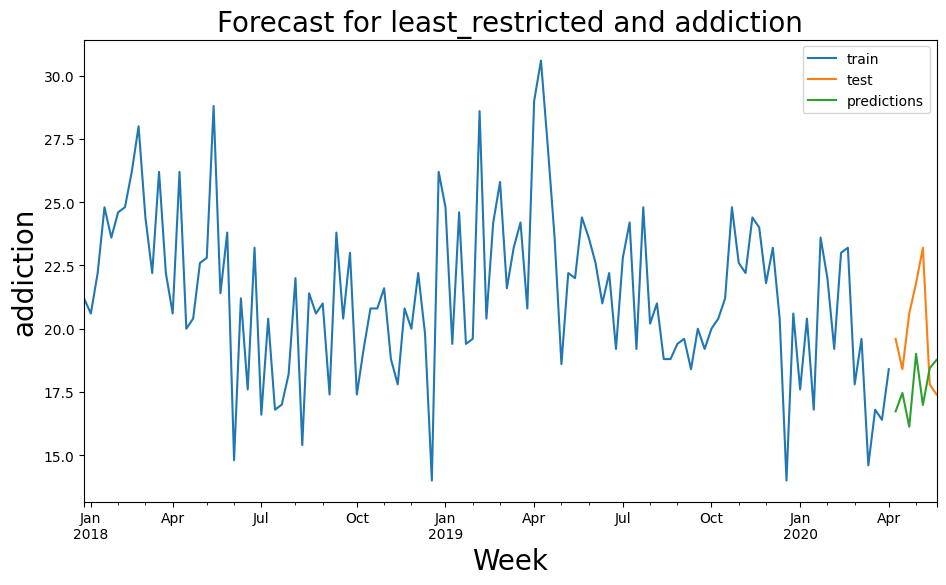


 Forecast for least_restricted and counselling untill 2020-05-30 

Test error (mse): 9.789459297139603 



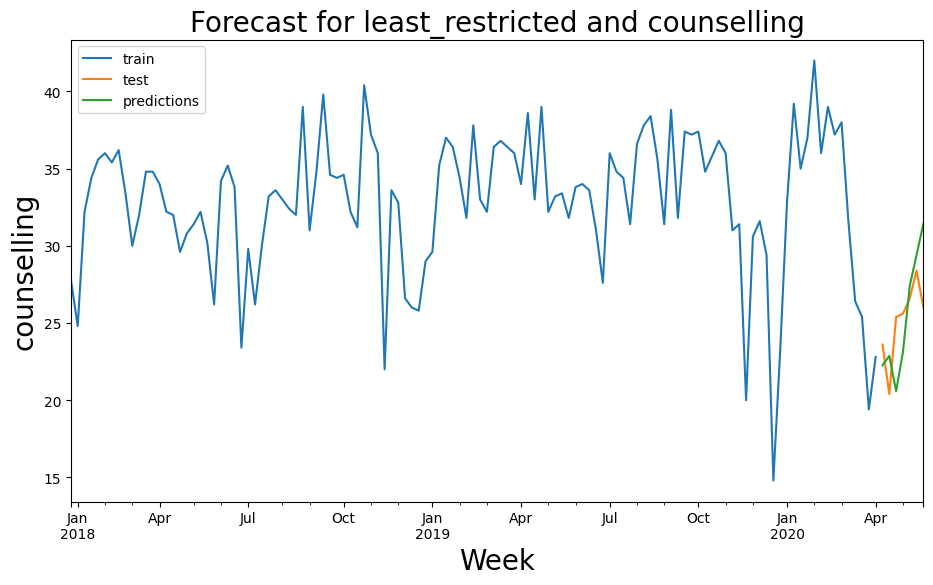


 Forecast for least_restricted and mental_health untill 2020-05-30 

Test error (mse): 4.684834741724319 



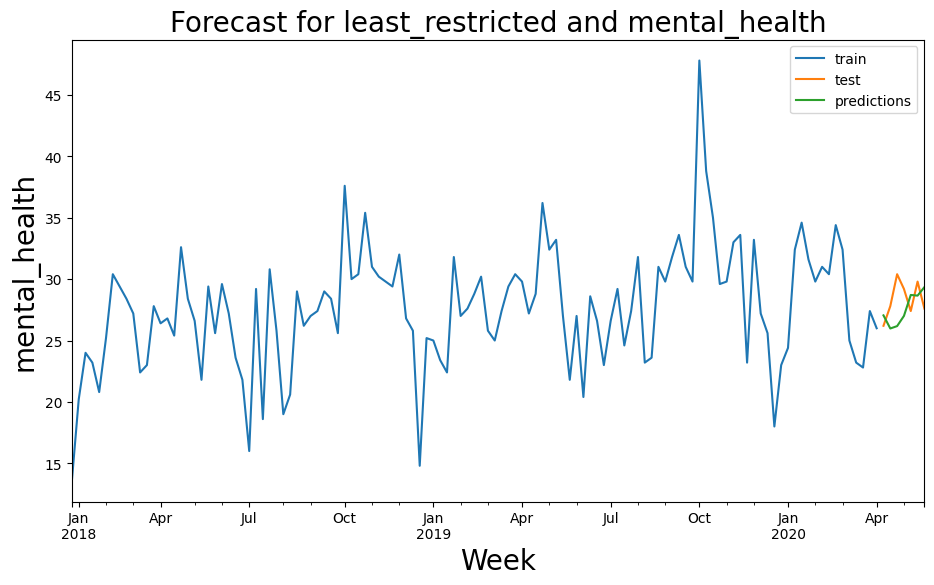

In [5]:
feature_imp_least = pd.DataFrame()
for search in searches_list:
        forecast = functions.forecast_file_search(file='least_restricted', period='2020-05-30', steps=7, search=search, regressor=Ridge(), lags=15)
        plt.show()
        if feature_imp_least.empty:
            feature_imp_least = forecast.get_feature_importance()
            feature_imp_least.rename(columns={'importance': search}, inplace=True)
        else:
            feature_imp_least = feature_imp_least.merge(forecast.get_feature_importance(), on = 'feature', how='left')
            feature_imp_least.rename(columns={'importance': search}, inplace=True)

MSE of all my models is lower than 100 and it is a good result we tried hyperparameter tuning, but it did not improve the MSE. 

### without Exogenous Variables 

In [7]:
for search in searches_list:
        functions.forecast_file_search_without_exogin(file='least_restricted', period='2020-05-30', steps=7, search=search, regressor=Ridge(), lags=15)


 Forecast for least_restricted and depression untill 2020-05-30 

Test error (mse): 24.963443025414865 


 Forecast for least_restricted and anxiety untill 2020-05-30 

Test error (mse): 15.650721555774982 


 Forecast for least_restricted and addiction untill 2020-05-30 

Test error (mse): 6.558564417352924 


 Forecast for least_restricted and counselling untill 2020-05-30 

Test error (mse): 54.79154778125543 


 Forecast for least_restricted and mental_health untill 2020-05-30 

Test error (mse): 6.0085000329592 



Counselling and Mental Health had much MSE with Exoginous features. Depression, Anxiety, and Addiction had lower scores without Exoginous features.

---

# SARIMAX

## Most Restricted Forecasting for start of COVID-19 pandemic 

### with Exogenous Variables 

In [9]:
def SARIMAX_model(train, test, order, seasonal_order, search):
    # fit model
    model = SARIMAX(train.drop(columns = ['stay_at_home', 'mask_mandate', 'gatherings_banned', 'business_closures', 'travel_restrictions']), exog=train[['stay_at_home', 'mask_mandate', 'gatherings_banned', 'business_closures', 'travel_restrictions']], order=order, seasonal_order=seasonal_order, freq = 'W-SUN')
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, exog=test[['stay_at_home', 'mask_mandate', 'gatherings_banned', 'business_closures', 'travel_restrictions']].values)
    print(model_fit.summary())
    res=pd.DataFrame({"pred":yhat, search:test[search].values})
    return res

In [10]:
def sarimax_forecast_file_search(file, period, steps, search, plot = True):
    '''
    Read the data and forecast for chosen search term with chosen regressor
    adapted from https://joaquinamatrodrigo.github.io/skforecast/0.3/guides/autoregresive-forecaster-exogenous.html 
    Input:
    file - lowercase name of the file 
    period - last date for the data, string, format Y-m-d, maxinmum 2023-01-01
    steps - int, test split (number of weeks for test data and predicting)
    search - string, search term    
    order - tuple, order for the model
    seasonal_order - tuple, seasonal order for the model
    plot - boolean, do we want a plot
    
    Output:
    State and Search term
    Forecaster output
    Predictions vs actual plot
    MSE 
    
    
    Return:
    Data Frame with results
    '''
    # Print state and search
    print(f'\n Forecast for {file} and {search} untill {period} \n' )
    
    # Read the data
    df = pd.read_csv(f'../data/{file}.csv', parse_dates=['week'], index_col='week')
    df = df[df.index < period]
    
    # get train and test data
    df_train = df[[search, 'stay_at_home', 'mask_mandate', 'gatherings_banned', 'business_closures', 'travel_restrictions']][:-steps]
    df_test = df[[search, 'stay_at_home', 'mask_mandate', 'gatherings_banned', 'business_closures', 'travel_restrictions']][-steps:]
    
    if search == 'depression':
        order = (1, 1, 1)
        seasonal_order = (2, 2, 2, 12) 
    elif search == 'anxiety':
        order = (0, 2, 1)
        seasonal_order = (0, 2, 2, 12) 
    elif search == 'addiction':
        order = (1, 1, 1)  
        seasonal_order = (0, 2, 2, 12)
    elif search == 'counselling':
        order = (2, 0, 2)  
        seasonal_order = (0, 2, 2, 12)
    elif search == 'mental_health':
        order = (0, 1, 2)   
        seasonal_order = (1, 2, 2, 12)
    
        
    
    # fit the model
    order = order
    seasonal_order = seasonal_order
    df_ret = SARIMAX_model(df_train, df_test, order, seasonal_order, search)
    
    search_str = search.title()
    if search == 'mental_health':
        search_str = 'Mental Health'
    
    # plot 
    if plot == True:
        plt.figure(figsize = (10, 6))
        plt.plot(df_ret['pred'], label = 'forecast')
        plt.plot(df.index, df[search], label = 'actual')
        plt.legend()
        plt.title(f'{search_str} SARIMAX forecasting compared to actual', size=20)
        plt.ylabel(search_str, size=20);
    
    return df_ret

In [11]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']


 Forecast for most_restricted and anxiety untill 2020-05-30 



C:\Users\ailin\anaconda3\envs\greykite\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ailin\anaconda3\envs\greykite\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\ailin\anaconda3\envs\greykite\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                        SARIMAX Results                                        
Dep. Variable:                                 anxiety   No. Observations:                  119
Model:             SARIMAX(0, 2, 1)x(0, 2, [1, 2], 12)   Log Likelihood                -319.858
Date:                                 Thu, 02 Feb 2023   AIC                            657.716
Time:                                         16:38:06   BIC                            680.509
Sample:                                     12-31-2017   HQIC                           666.919
                                          - 04-05-2020                                         
Covariance Type:                                   opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
stay_at_home           36.2610      9.088      3.990    

,pred,anxiety
2020-04-12,61.383448,65.166667
2020-04-19,-11.056979,68.333333
2020-04-26,-16.664735,69.500000
2020-05-03,-12.461861,64.166667
2020-05-10,-89.049925,69.500000
2020-05-17,-94.885934,69.500000
2020-05-24,-110.371868,70.166667


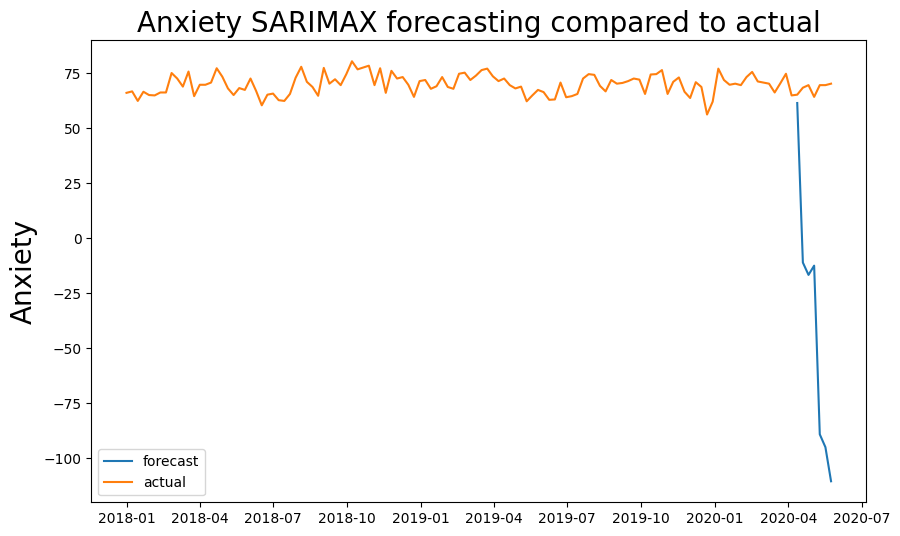

In [12]:
sarimax_forecast_file_search(file='most_restricted', period='2020-05-30', steps = 7, search = 'anxiety', plot = True)

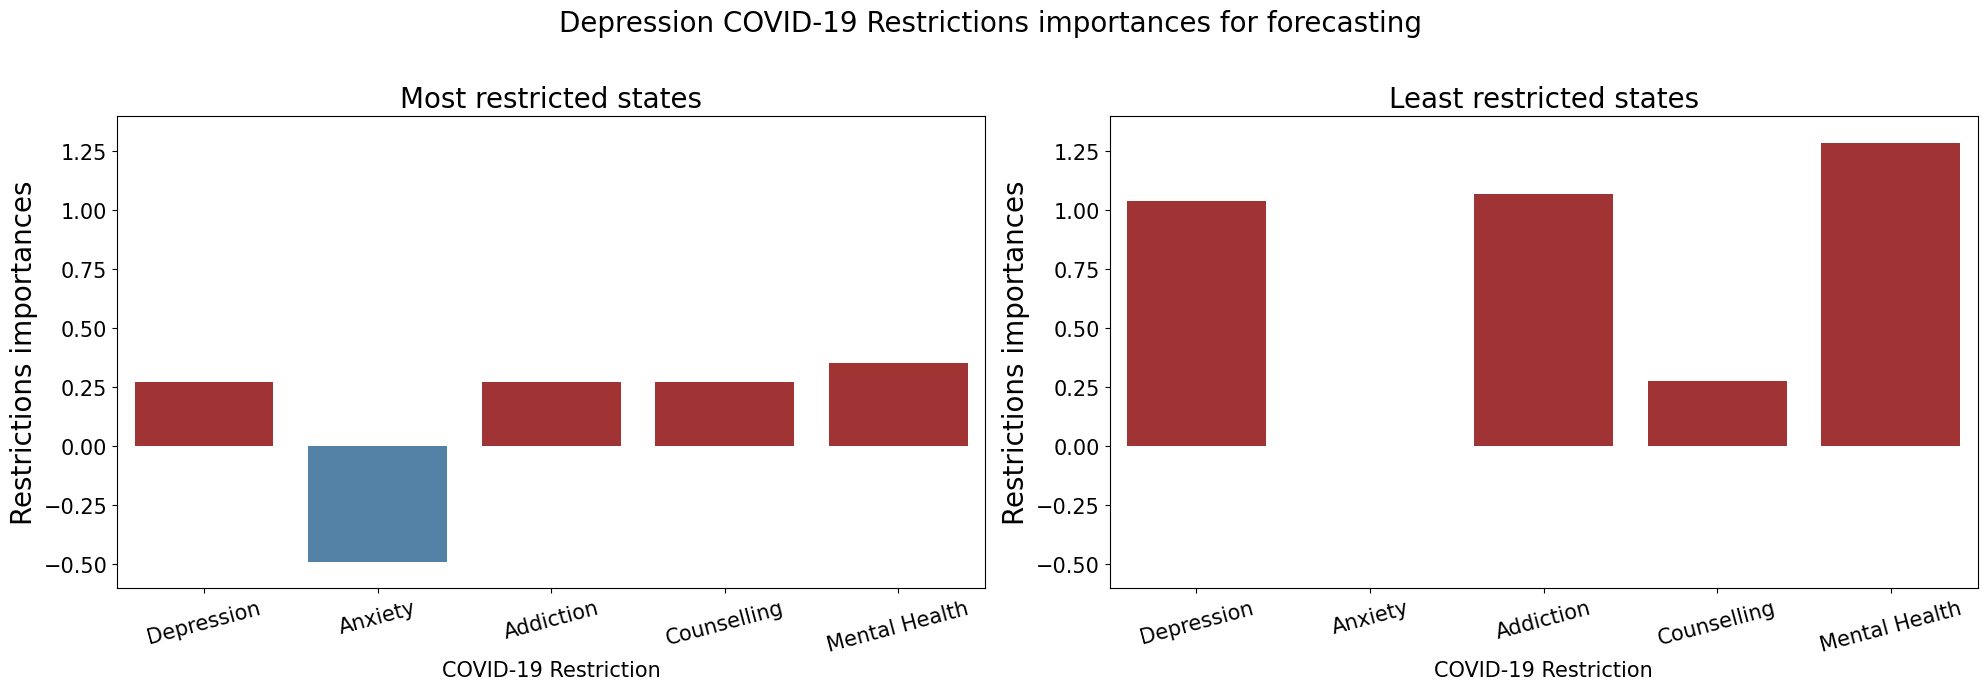

In [10]:
# Restriction importances for Depression
functions.plot_resiriction_importances(feature_imp_all, 'depression', ylim=[-0.6, 1.4], time='2020-05-30')

Unexpectedly the COVID restrictions impacted Least restricted states' searches more than Most Restricted. All of our least restricted states did not have mas mandates in the timeframe of this prediction - until May 2020

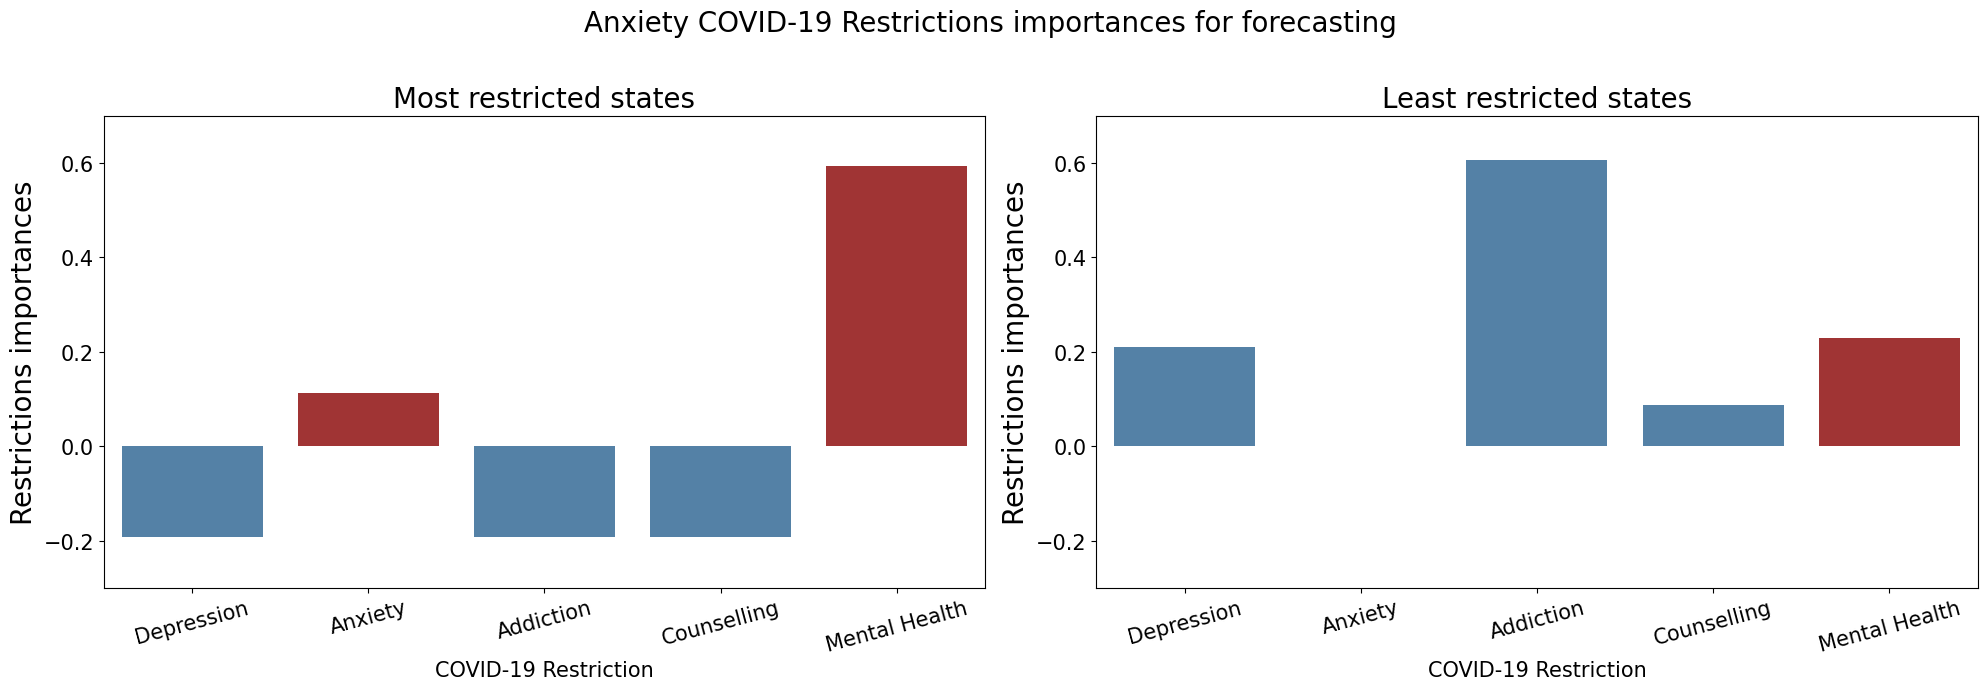

In [11]:
# Restriction importances for Anxiety
functions.plot_resiriction_importances(feature_imp_all, 'anxiety', ylim=[-0.3, 0.7], time='2020-05-30')

Anxiety has low feature importance for COVID restrictions. The most prominent are Trave_restriction for Most and Gatherings banned for Least Restricted States. They both correlated with a slight increase in Axienty searches.

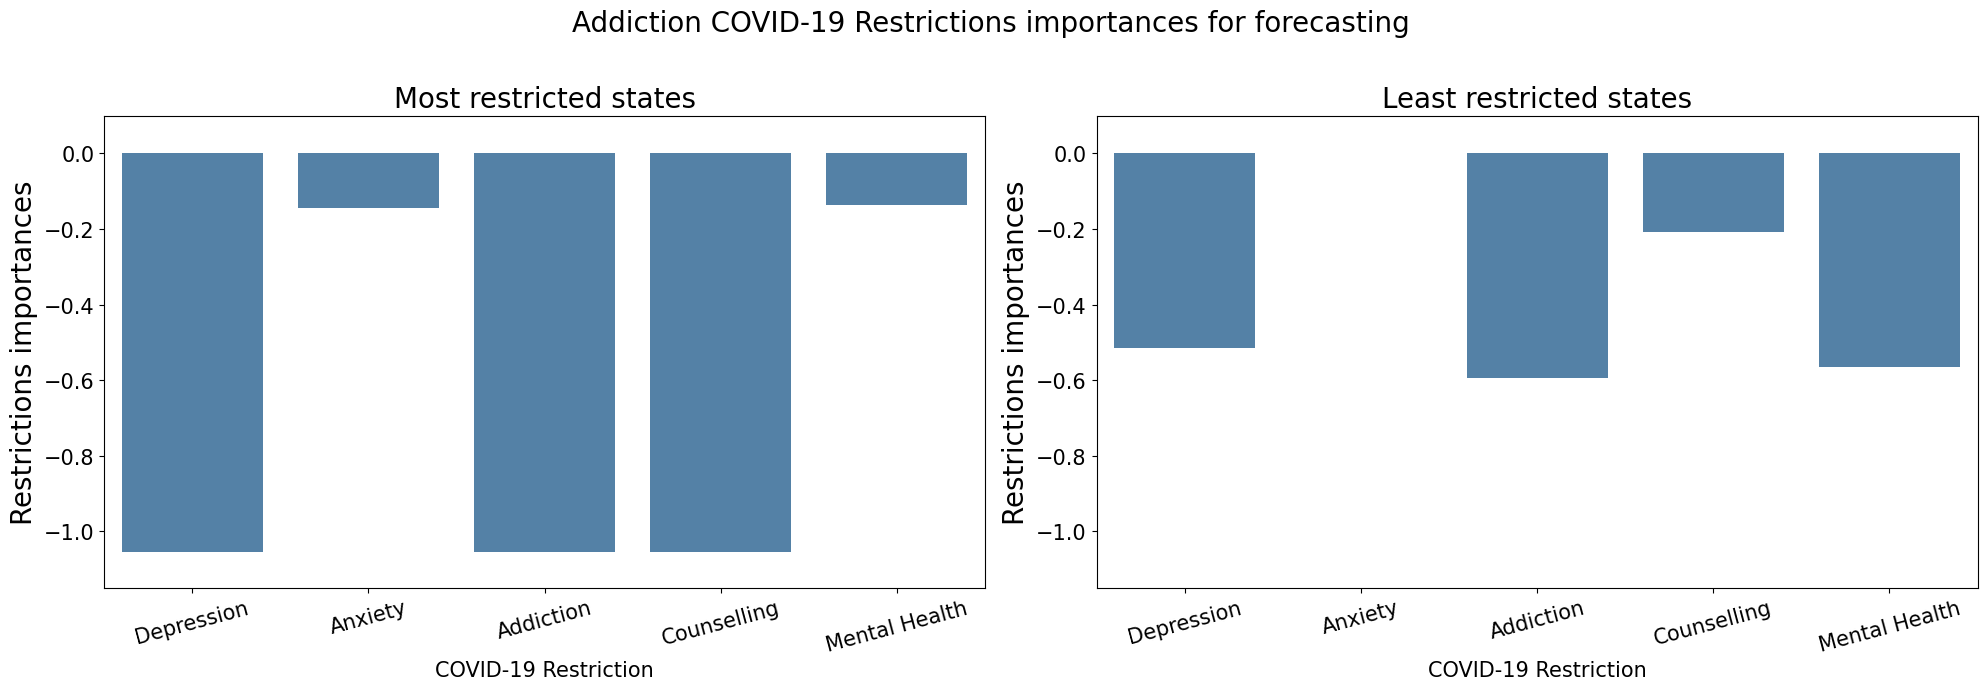

In [12]:
# Restriction importances for Addiction
functions.plot_resiriction_importances(feature_imp_all, 'addiction', ylim=[-1.15, 0.1], time='2020-05-30')

All restrictions had a negative correlation with Addiction searches, it is Stronger in Most Restricted States.

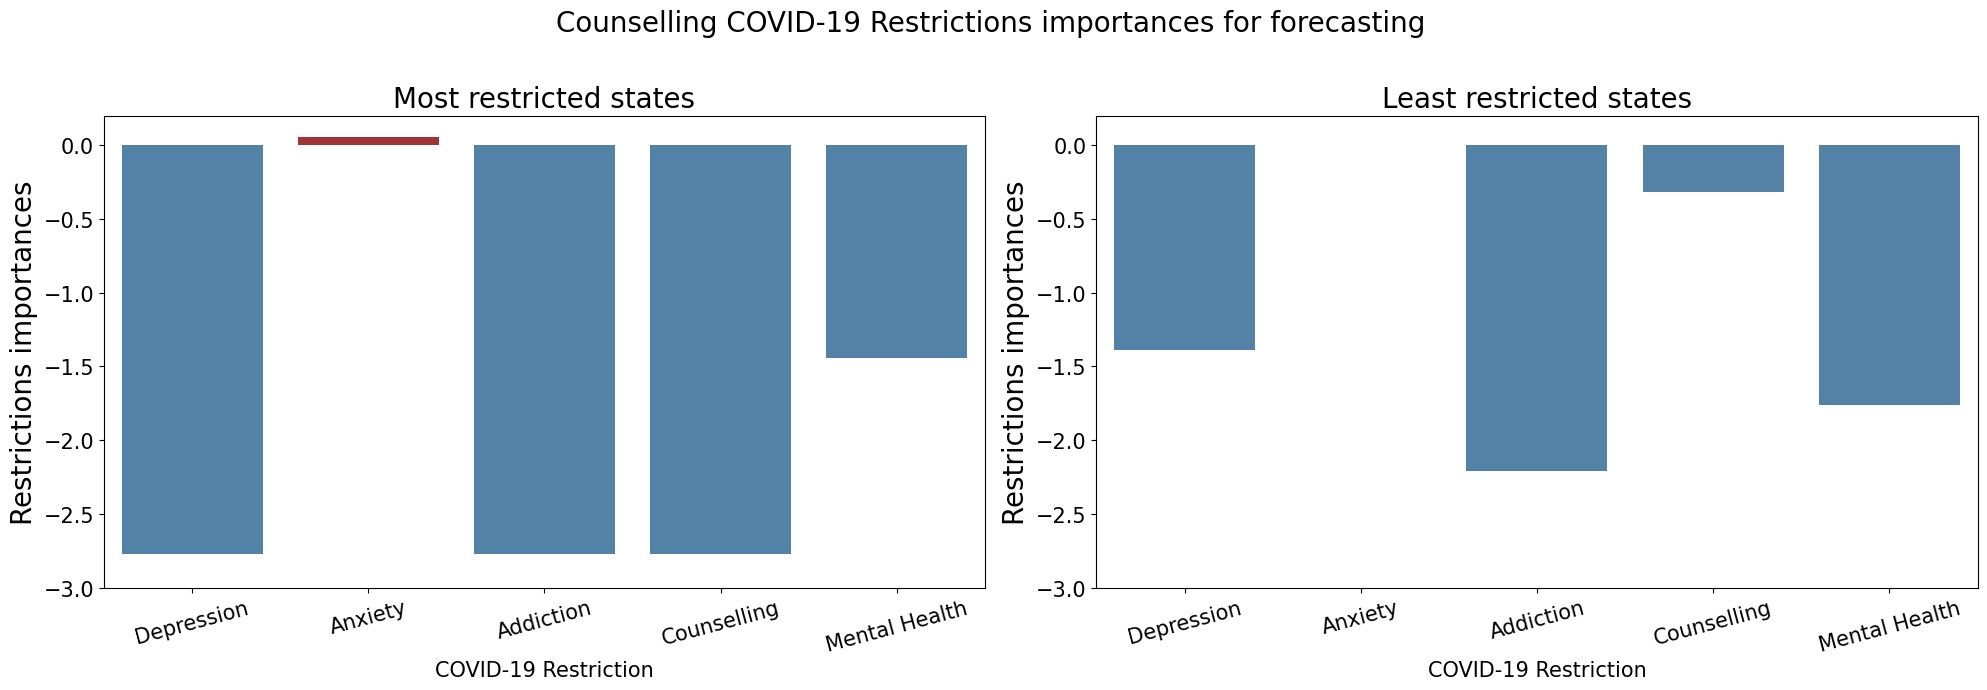

In [13]:
# Restriction importances for Counselling
functions.plot_resiriction_importances(feature_imp_all, 'counselling', ylim=[-3, 0.2], time='2020-05-30')

Most COVID-19 restrictions have quite strong negative impact on Counseling searches for both Most and Least Restricted States.

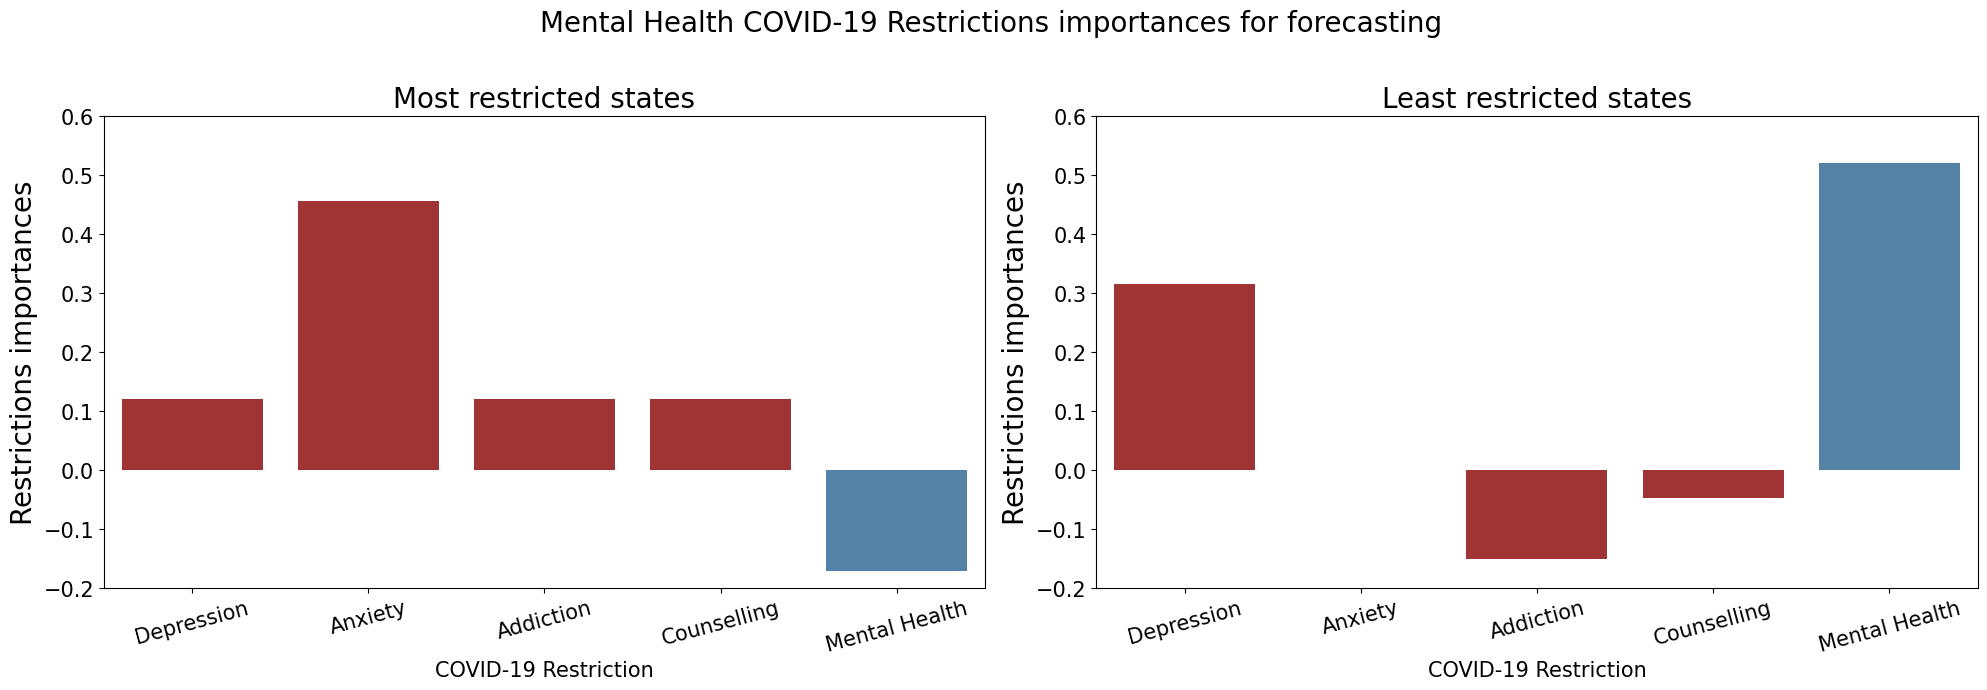

In [14]:
# Restriction importances for Mental Health
functions.plot_resiriction_importances(feature_imp_all, 'mental_health', ylim=[-0.2, 0.6], time='2020-05-30')

Mental Health searches have low feature importance for COVID restrictions. The most prominent are Mask Mandate for Most and Travel Restrictions for Least Restricted States. They both correlated with a slight increase in Axienty searches.

---

Counseling searches have the biggest feature importances for COVID-19 Restrictions. For other searches, the feature importances are quite low. In the nex notebook we will explore Feature importances for Searches during Middle part of COVID-19 Restrictions (until October 2020)